In [1]:
import numpy as np
import pandas as pd
from lib.data_loading import loadHeadersCSV
from lib.plotting import *
from lib.helpers import *

# Build all other dataframes from this one
headers = loadHeadersCSV('data/header_analyses.csv')

# Overview

## Sample size

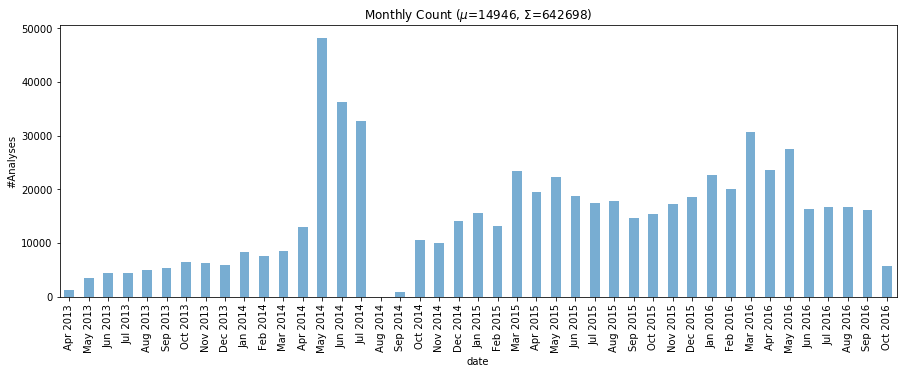

In [2]:
# Monthly count for all samples
monthly_count = headers.md5.resample('M').count()
monthly_count = monthly_count.rename('All samples')
plotByMonth(monthly_count,
            'monthly_count',
            'Monthly Count ($\mu$={:.0f}, $\Sigma$={})'.format(monthly_count.mean(), monthly_count.sum()))

## Duplicates

Total number of unique analysis: 550049
Total number of duplicated analysis: 92649


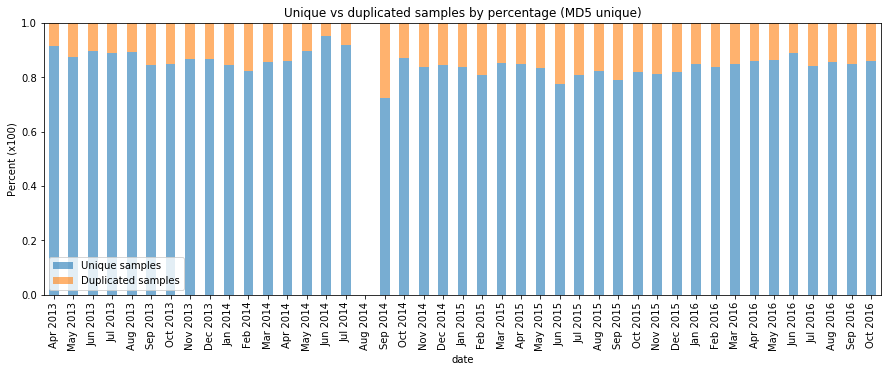

In [3]:
unique_count = headers.drop_duplicates(subset='md5').md5.resample('M').count().rename('Unique samples')
duplicated_count = headers[headers.duplicated(subset='md5')].md5.resample('M').count().rename('Duplicated samples')
print('Total number of unique analysis: {}'.format(unique_count.sum()))
print('Total number of duplicated analysis: {}'.format(duplicated_count.sum()))
dups_percent = pd.concat([unique_count, duplicated_count], axis=1)
dups_percent = dups_percent.divide(dups_percent.sum(axis=1), axis=0)
plotByMonthPercentage(dups_percent, 'dups_percent', 'Unique vs duplicated samples by percentage (MD5 unique)')

In [4]:
# Sanity check
assert unique_count.sum() + duplicated_count.sum() == len(headers)

# Distribution of file types

In [5]:
# Different file types scanned
file_types = headers.file_type.unique()
print('Total unique file types: {}\n'.format(len(file_types)))
# for t in sorted(file_types):
#     print(t)

Total unique file types: 4407



The high number of file types can be easily explained by looking at the types list. Many of the types result to the same general type, but differ due to factors like versioning, size (for images) and encoding.

## Executables

In [6]:
# Some ELF/Mach-O files are not caught by "executable" filter, added manually
exec_crit = headers.file_type.map(lambda x: 'executable' in x.lower() or x.startswith('ELF') or x.startswith('Mach-O'))
exec_types = sorted(headers.file_type[exec_crit].unique())
print('Total unique file types with "executable": {}\n'.format(len(exec_types)))
for t in exec_types:
    print(t)

Total unique file types with "executable": 413

80386 COFF executable - version 2264
80386 COFF executable - version 3077
80386 COFF executable not stripped - version 25970
80386 COFF executable not stripped - version 30821
ASCII text, with no line terminatorsPE32 executable (GUI) Intel 80386  ...
ASCII text, with no line terminatorsPE32 executable (GUI) Intel 80386, ...
ASCII text, with very long linesPE32 executable (GUI) Intel 80386, for ...
BALANCE NS32000 executable (0 @ 0) version 1912629504
Bourne-Again shell script, ASCII text executable
Bourne-Again shell script, ASCII text executable, with CRLF line termi ...
Bourne-Again shell script, ASCII text executable, with very long lines
Bourne-Again shell script, UTF-8 Unicode text executable
Bourne-Again shell script, UTF-8 Unicode text executable, with very lo ...
COM executable for DOS
COM executable for MS-DOS
DOS executable (COM)
DOS executable (block device driver :\)
DOS executable (block device driver)
DOS executable (block d

### Windows Portable Executables (32bit)
These analysis *generally* contain both static and dynamic analysis

In [7]:
pe32_types = list(filter(lambda x: x.startswith('PE32 '), exec_types))
print('Total unique PE32 (32bit) types: {}\n'.format(len(pe32_types)))
for t in pe32_types:
    print(t)

Total unique PE32 (32bit) types: 91

PE32 executable (DLL) (EFI application) EFI byte code, for MS Windows
PE32 executable (DLL) (GUI) Intel 80386 (stripped to external PDB) sys ...
PE32 executable (DLL) (GUI) Intel 80386 (stripped to external PDB), fo ...
PE32 executable (DLL) (GUI) Intel 80386 Mono/.Net assembly, for MS Win ...
PE32 executable (DLL) (GUI) Intel 80386, for MS Windows
PE32 executable (DLL) (GUI) Intel 80386, for MS Windows, PECompact2 co ...
PE32 executable (DLL) (GUI) Intel 80386, for MS Windows, Petite compre ...
PE32 executable (DLL) (GUI) Intel 80386, for MS Windows, UPX compresse ...
PE32 executable (DLL) (GUI) Intel 80386, for MS WindowsHTML document,  ...
PE32 executable (DLL) (GUI) Intel 80386, for MS Windowsdata
PE32 executable (DLL) (console) ARMv7 Thumb, for MS Windows
PE32 executable (DLL) (console) Intel 80386 (stripped to external PDB) ...
PE32 executable (DLL) (console) Intel 80386 Mono/.Net assembly, for MS ...
PE32 executable (DLL) (console) Intel 8038

### Other architectures/platforms

In [8]:
not_pe32_types = list(filter(lambda x: not x.startswith('PE32 '), exec_types))
print('Total unique not PE32 (32bit) types: {}\n'.format(len(not_pe32_types)))
for t in not_pe32_types:
    print(t)

Total unique not PE32 (32bit) types: 322

80386 COFF executable - version 2264
80386 COFF executable - version 3077
80386 COFF executable not stripped - version 25970
80386 COFF executable not stripped - version 30821
ASCII text, with no line terminatorsPE32 executable (GUI) Intel 80386  ...
ASCII text, with no line terminatorsPE32 executable (GUI) Intel 80386, ...
ASCII text, with very long linesPE32 executable (GUI) Intel 80386, for ...
BALANCE NS32000 executable (0 @ 0) version 1912629504
Bourne-Again shell script, ASCII text executable
Bourne-Again shell script, ASCII text executable, with CRLF line termi ...
Bourne-Again shell script, ASCII text executable, with very long lines
Bourne-Again shell script, UTF-8 Unicode text executable
Bourne-Again shell script, UTF-8 Unicode text executable, with very lo ...
COM executable for DOS
COM executable for MS-DOS
DOS executable (COM)
DOS executable (block device driver :\)
DOS executable (block device driver)
DOS executable (block device 

## Text files

This includes source files, scripts, html, etc.

In [9]:
text_keywords = ['text', 'foxpro']
text_crit = headers.file_type.map(mapKeywords(text_keywords))
# Exclude what was considered executable type
text_types = sorted(headers.file_type[~exec_crit & text_crit].unique())
print('Total unique file types with "text": {}\n'.format(len(text_types)))
for t in text_types:
    print(t)

Total unique file types with "text": 493

ASCII C program text
ASCII C program text, with CRLF line terminators
ASCII C program text, with CRLF, CR line terminators
ASCII C program text, with CRLF, LF line terminators
ASCII C program text, with very long lines
ASCII C program text, with very long lines, with CRLF line terminators
ASCII C program text, with very long lines, with CRLF, LF line termina ...
ASCII C program text, with very long lines, with no line terminators
ASCII C++ program text
ASCII C++ program text, with CRLF line terminators
ASCII C++ program text, with CRLF, CR line terminators
ASCII C++ program text, with CRLF, LF line terminators
ASCII C++ program text, with very long lines
ASCII C++ program text, with very long lines, with CRLF line terminato ...
ASCII C++ program text, with very long lines, with CRLF, LF line termi ...
ASCII English text
ASCII English text, with CRLF line terminators
ASCII English text, with CRLF, CR line terminators
ASCII English text, with CRL

## Media (images, audio, video)

In [10]:
media_keywords = ['image', 'audio', 'video', 'mpeg', 'bitmap', 'icon resource']
media_crit = headers.file_type.map(mapKeywords(media_keywords))
media_types = sorted(headers.file_type[~exec_crit & ~text_crit & media_crit].unique())
print('Total unique file types with {}: {}\n'.format(media_keywords, len(media_types)))
for t in media_types:
    print(t)

Total unique file types with ['image', 'audio', 'video', 'mpeg', 'bitmap', 'icon resource']: 1652

Adobe Photoshop Image, 1 x 1, RGBA, 4x 8-bit channels
Adobe Photoshop Image, 1000 x 349, RGB, 3x 8-bit channels
Adobe Photoshop Image, 1000 x 624, RGB, 3x 8-bit channels
Adobe Photoshop Image, 1012 x 638, RGB, 3x 8-bit channels
Adobe Photoshop Image, 1200 x 847, RGBA, 4x 8-bit channels
Adobe Photoshop Image, 1590 x 2114, RGB, 3x 8-bit channels
Adobe Photoshop Image, 1850 x 2700, RGB, 3x 8-bit channels
Adobe Photoshop Image, 225 x 98, RGB, 3x 8-bit channels
Adobe Photoshop Image, 3500 x 4000, RGB, 3x 8-bit channels
Adobe Photoshop Image, 400 x 250, RGB, 3x 8-bit channels
Adobe Photoshop Image, 500 x 653, RGBA, 4x 8-bit channels
Adobe Photoshop Image, 6800 x 9359, grayscale, 8-bit channel
Adobe Photoshop Image, 992 x 1388, RGB, 3x 8-bit channels
AmigaOS bitmap font
Atari ATR image
Audio file with ID3 version 2.2.0, contains: MPEG ADTS, layer III, v1, ...
Audio file with ID3 version 2.3.0
Au

## Archives

In [11]:
arch_keywords = ['archive', 'compressed']
arch_crit = headers.file_type.map(mapKeywords(arch_keywords))
arch_types = sorted(headers.file_type[~exec_crit & ~text_crit & ~media_crit & arch_crit].unique())
print('Total unique archive types: {}\n'.format(len(arch_types)))
for t in arch_types:
    print(t)

Total unique archive types: 1343

, Nullsoft Installer self-extracting archive
7-zip archive data, version 0.2
7-zip archive data, version 0.3
7-zip archive data, version 0.4
7-zip archive data, version 32.3
ACB archive data
ACE archive data version 20, from Win/32, version 10 to extract
ACE archive data version 20, from Win/32, version 20 to extract, conta ...
ACE archive data version 20, from Win/32, version 20 to extract, solid
ARJ archive data, v102, slash-switched, original name: ,
ARJ archive data, v4, slash-switched, original name: RESTORE.INS, os:  ...
ASCII cpio archive (SVR4 with no CRC)
ASCII cpio archive (pre-SVR4 or odc)
ASD archive data
Arhangel archive data
Atari MSA archive data, 4113 sectors per track, starting track: 5141,  ...
BlakHole archive data
Dzip archive data, version 67.76
FreeArc archive <http://freearc.org>
HIT archive data
JAR compressed with pack200,
JAR compressed with pack200, version 150.7
LHa (2.x) archive data [lh5]
LHa (2.x) archive data [lh6]
LHa (

## Documents

In [12]:
doc_keywords = ['pdf', 'microsoft ', 'composite document file', 'fdf document', 'opendocument']
doc_crit = headers.file_type.map(mapKeywords(doc_keywords))
doc_types = sorted(headers.file_type[~exec_crit & ~text_crit & ~media_crit & ~arch_crit & doc_crit].unique())
print('Total unique document types: {}\n'.format(len(doc_types)))
for t in doc_types:
    print(t)

Total unique document types: 58

Composite Document File V2 Document, Big Endian, Os 0, Version: 0.0
Composite Document File V2 Document, Big Endian, Os 65535, Version: 25 ...
Composite Document File V2 Document, Little Endian, Os 0, Version: 3.1 ...
Composite Document File V2 Document, Little Endian, Os 0, Version: 3.9 ...
Composite Document File V2 Document, Little Endian, Os: MacOS, Version ...
Composite Document File V2 Document, Little Endian, Os: Windows, Versi ...
Composite Document File V2 Document, No summary info
Composite Document File V2 Document, corrupt: Can't expand summary_inf ...
Composite Document File V2 Document, corrupt: Can't read SAT
Composite Document File V2 Document, corrupt: Can't read SSAT
Composite Document File V2 Document, corrupt: Can't read directory
Composite Document File V2 Document, corrupt: Cannot read short stream
Composite Document File V2 Document, corrupt: Cannot read summary info
FDF document, version 1.2
Microsoft ASF
Microsoft Access Databas

## Remaining types

In [13]:
# Used to tune the previous sections for missing types
other_types = sorted(headers.file_type[~exec_crit & ~text_crit & ~media_crit & ~arch_crit & ~doc_crit].unique())
print('Total unique remaining types: {}\n'.format(len(other_types)))
for t in other_types:
    print(t)

Total unique remaining types: 448

# ISO 9660 CD-ROM filesystem data '20130508_0737'
# ISO 9660 CD-ROM filesystem data '20130508_0750'
# ISO 9660 CD-ROM filesystem data '20150723_1825'
# ISO 9660 CD-ROM filesystem data '20151026_1649'
# ISO 9660 CD-ROM filesystem data 'CDROM'
# ISO 9660 CD-ROM filesystem data 'DBAN' (bootable)
# ISO 9660 CD-ROM filesystem data 'DISC'
# ISO 9660 CD-ROM filesystem data 'Dropbox Installer'
# ISO 9660 CD-ROM filesystem data 'HACKVENT_2015'
# ISO 9660 CD-ROM filesystem data 'Installer'
# ISO 9660 CD-ROM filesystem data 'J_CENA_X64FREV_EN-US_DV5' (bootable ...
# ISO 9660 CD-ROM filesystem data 'KMSPico 10.1.9'
# ISO 9660 CD-ROM filesystem data 'KMSPico 10.2.1'
# ISO 9660 CD-ROM filesystem data 'MT410' (bootable)
# ISO 9660 CD-ROM filesystem data 'NEW'
# ISO 9660 CD-ROM filesystem data 'NEW' (bootable)
# ISO 9660 CD-ROM filesystem data 'Samples'
# ISO 9660 CD-ROM filesystem data 'Windows Loader 2.6'
# ISO 9660 CD-ROM filesystem data 'chntpw 140201' (bootable)

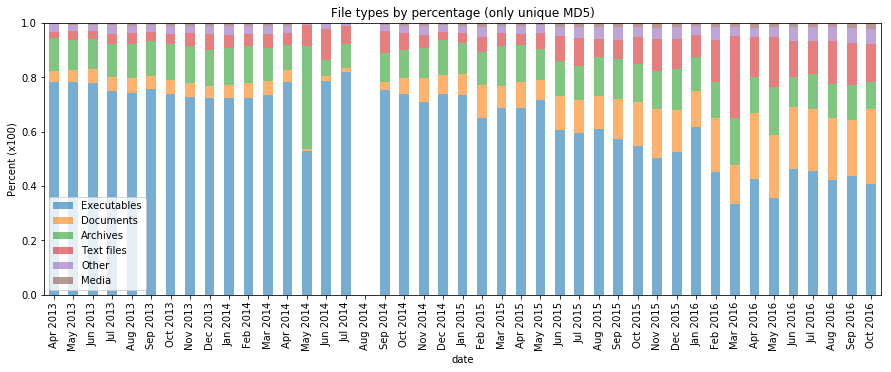

In [14]:
exec_count = headers[exec_crit].drop_duplicates(subset='md5').md5.resample('M').count().rename('Executables')
text_count = headers[text_crit].drop_duplicates(subset='md5').md5.resample('M').count().rename('Text files')
media_count = headers[media_crit].drop_duplicates(subset='md5').md5.resample('M').count().rename('Media')
arch_count = headers[arch_crit].drop_duplicates(subset='md5').md5.resample('M').count().rename('Archives')
doc_count = headers[doc_crit].drop_duplicates(subset='md5').md5.resample('M').count().rename('Documents')
other_count = headers[~exec_crit & ~text_crit & ~media_crit & ~arch_crit & ~doc_crit].drop_duplicates(subset='md5').md5.resample('M').count().rename('Other')

monthly_percent = pd.concat([exec_count, doc_count, arch_count, text_count, other_count, media_count], axis=1)
monthly_percent = monthly_percent.divide(monthly_percent.sum(axis=1), axis=0)
plotByMonthPercentage(monthly_percent, 'monthly_percent_unique', 'File types by percentage (only unique MD5)')

In [15]:
# Sanity check
assert len(file_types) == len(exec_types) + len(text_types) + len(media_types) + len(doc_types) + len(arch_types) + len(other_types)

# Antivirus Classification

The amount of vendors varies throughout the time, hence the choice of normalizing by dividing the positive classifications by the total amount of vendors at the time of the analysis.

The following accounts only for unique samples, for duplicated samples only the last analysis is taken into account. Samples that were unknown in VirusTotal are given a value of -1.

In [16]:
# Keeping this in a separate cell, since it takes 'some' time to exec
av_col = headers.drop_duplicates(subset='md5', keep='last').antivirus
av_col = av_col.apply(normalize)

In [17]:
av_col_known = av_col[av_col != -1]
av_col_unknown = av_col[av_col == -1]
print('Number of known (in VirusTotal) samples:\t{}'.format(av_col_known.count()))
print('Number of unknown samples:\t\t\t{}'.format(av_col_unknown.count()))
print('Mean for known samples:\t\t\t\t{:.2f}'.format(av_col_known.mean()))
print('Standard deviation for known samples:\t\t{:.2f}'.format(av_col_known.std()))

Number of known (in VirusTotal) samples:	371837
Number of unknown samples:			178212
Mean for known samples:				0.28
Standard deviation for known samples:		0.31


The main problem now is defining the threshold that classifies a sample as malware.

The following values may need tweaking...

Malware:	135247 (0.36)
Not malware:	160967 (0.43)
Grey area:	75623 (0.20)


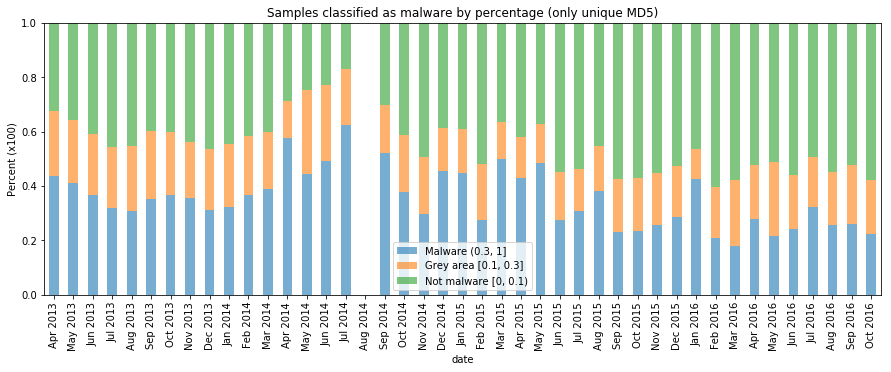

In [18]:
NOTMAL_THR = 0.1
MAL_THR = 0.3
av_col_notmal = av_col_known[av_col_known < NOTMAL_THR]
av_col_mal = av_col_known[av_col_known > MAL_THR]
av_col_grey = av_col_known[(NOTMAL_THR <= av_col_known) & (av_col_known <= MAL_THR)]
print('Malware:\t{} ({:.2f})'.format(av_col_mal.count(), av_col_mal.count()/av_col_known.count()))
print('Not malware:\t{} ({:.2f})'.format(av_col_notmal.count(), av_col_notmal.count()/av_col_known.count()))
print('Grey area:\t{} ({:.2f})'.format(av_col_grey.count(), av_col_grey.count()/av_col_known.count()))

# Sanity check
assert len(av_col_known) == len(av_col_notmal) + len(av_col_mal) + len(av_col_grey)

av_col_notmal = av_col_notmal.resample('M').count().rename('Not malware [0, {})'.format(NOTMAL_THR))
av_col_mal = av_col_mal.resample('M').count().rename('Malware ({}, 1]'.format(MAL_THR))
av_col_grey = av_col_grey.resample('M').count().rename('Grey area [{}, {}]'.format(NOTMAL_THR, MAL_THR))

malware_percent = pd.concat([av_col_mal, av_col_grey, av_col_notmal], axis=1)
malware_percent = malware_percent.divide(malware_percent.sum(axis=1), axis=0)
plotByMonthPercentage(malware_percent, 'malware_percent', 'Samples classified as malware by percentage (only unique MD5)')

## Evolution in duplicated samples

How long until an unknown sample becomes known?

Do samples tend to increase or decrease in classification (i.e. false positive rate, false negative)?

How much time do vendors take to identify new malware (i.e. time from 0.0 to some threshold)?

In [19]:
dups_class = headers.copy()
dups_class['index'] = dups_class.index
# Apply the normalization again, to facilitate filtering
dups_class['antivirus'] = dups_class['antivirus'].apply(normalize)
# Keep only duplicated samples that changed the antivirus classification
dups_class = dups_class.drop_duplicates(['md5', 'antivirus'])
# Keep only duplicated that changed in time, don't have access to the fulltimestamp, hence same day samples
# won't be helpful
# dups_class = dups_class.drop_duplicates(['md5', 'index'], keep='last')
# Keep only duplicates
dups_class = dups_class[dups_class.duplicated(subset='md5', keep=False)]

### From unknown to known

Check how much time it takes for a sample to go from unknown to known, this doesn't take into account if the sample is actually malware or not.

In [20]:
# If the first submission was unknown (-1), calculate the time it took until
# sample became known.
def unknown_to_known(sample):
    if sample[0] == -1:
        for idx, val in enumerate(sample[1:]):
            if val != -1:
                # We take the average between the submission when the sample was known and the
                # submission before that, to give the vendors some slack
                # + 1 because we're enumerating from [1:]
                avg_days = (sample.index[idx + 1] - sample.index[idx]).days / 2
                return (sample.index[idx + 1] - sample.index[0]).days - avg_days
    else:
        return -1.0
        
dups_unk_to_k = dups_class.groupby('md5').agg({'antivirus': unknown_to_known}).antivirus.rename('days')
dups_unk_to_k = (dups_unk_to_k[dups_unk_to_k.map(lambda x: x != -1)]).astype(int)

print('Mean (in days) for a sample to become known:\t{:.2f}'.format(dups_unk_to_k.mean()))
print('Median for a sample to become known:\t\t{:.2f}'.format(dups_unk_to_k.median()))
print('Standard deviation (in days):\t\t\t{:.2f}'.format(dups_unk_to_k.std()))

Mean (in days) for a sample to become known:	19.56
Median for a sample to become known:		0.00
Standard deviation (in days):			55.75


One must take into account that the only available information is from malwr.com, which means samples may become known sooner, but one only knows after the sample has been resubmitted.

### Tendency in the classification

Check if the tendency for duplicated samples is to increase or decrease, in terms of classification.

Given that the classification results are only shown for vendors that have seen the sample, an upward tendency reflects a false negative tendency, while a downward tendency indicates a false positive tendency.

In [21]:
# Calculates the tendency for a given sample, based on duplicated submissions
# Returns 1 for positive tendency (later submissions have higher classification)
# Returns -1 for negative tendency (later submissions have lower classification)
# Returns 0 for no tendency (classification between submissions doesn't go above a threshold)
# Returns -2 if there aren't enough submissions to check for a tendency
def tendency(sample):
    from functools import reduce
    # If the submissions didn't vary by more than this threshold, no tendency
    CHANGE_THR = 0.05
    values = []
    
    for idx, val in sample.iteritems():
        if val != -1:
            values.append(val)
    # Not enough values to check for tendency
    if len(values) < 2:
        return -2
    
    diff = [y - x for x, y in zip(values, values[1:])]
    # The mean variation is above the threshold
    if reduce(lambda x, y: abs(x) + abs(y), diff)/len(diff) > CHANGE_THR:
        pos = sum(x > 0 for x in diff)
        neg = sum(x < 0 for x in diff)
        return 1 if pos > neg else -1
    else:
        return 0
        

dups_tendency = dups_class.groupby('md5').agg({'antivirus': tendency}).antivirus.rename('tendency').astype(int)

In [22]:
pos_tend = dups_tendency[dups_tendency == 1]
neg_tend = dups_tendency[dups_tendency == -1]

print('Number of submissions with positive tendency: {} ({:.2f})'.format(pos_tend.count(), pos_tend.count()/dups_tendency.count()))
print('Number of submissions with negative tendency: {} ({:.2f})'.format(neg_tend.count(), neg_tend.count()/dups_tendency.count()))

Number of submissions with positive tendency: 10828 (0.44)
Number of submissions with negative tendency: 563 (0.02)


The positive tendency for over 50% of duplicated samples shows that vendors do prefer to classify

that the sample takes some time to propagate between vendors, while the negative tendency around 2% reflects a low false positive rate correction, meaning that vendors do not tend to unclassify a sample as malware.

### Average time to classify a malware

How much time does it take for a sample to go from "not malware" to "malware". Assuming the previous threshold.

In [23]:
# Calculate the days it took for a sample go from below the threshold
# to above the malware threshold. Only includes samples that were known but
# not classified as malware
def zero_to_malware(sample):
    if 0 <= sample[0] < NOTMAL_THR:
        for idx, val in enumerate(sample[1:]):
            if val > 0.3:
                # + 1 because we're enumerating from [1:]
                avg_days = (sample.index[idx + 1] - sample.index[idx]).days / 2
                return (sample.index[idx + 1] - sample.index[0]).days - avg_days
        # If the sample never goes above the threshold
        return -1
    else:
        return -1
    
dups_zero_to_mal = dups_class.groupby('md5').agg({'antivirus': zero_to_malware}).antivirus.rename('days')
dups_zero_to_mal = dups_zero_to_mal[dups_zero_to_mal != -1]
# print(dups_zero_to_mal)

print('Mean (in days) to go from below the threshold to above:\t{:.2f}'.format(dups_zero_to_mal.mean()))
print('Median to go from below the threshold to above:\t\t{:.2f}'.format(dups_zero_to_mal.median()))
print('Standard deviation:\t\t\t\t\t{:.2f}'.format(dups_zero_to_mal.std()))

Mean (in days) to go from below the threshold to above:	31.09
Median to go from below the threshold to above:		2.00
Standard deviation:					86.79


Like before, the obtained values are limited by the rebumissions to malwr.com, hence giving some slack between the submission above the threshold and the one before.

# Focusing on PE32 samples

## Sample size

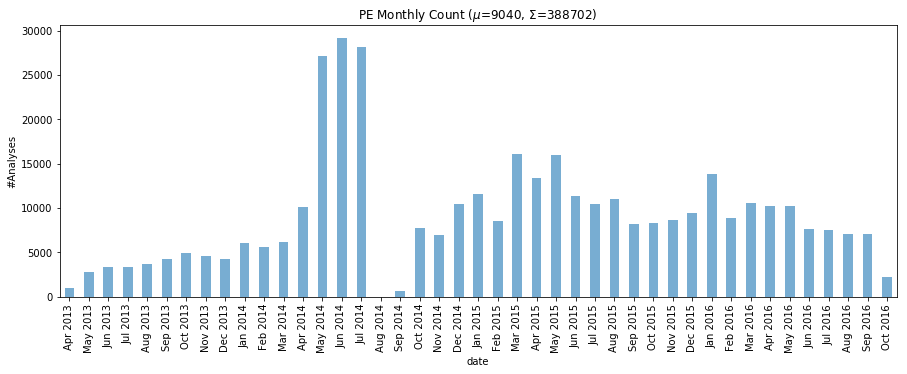

In [24]:
# Monthly count for PE32 samples
crit_pe32 = headers.file_type.map(lambda x: str(x).startswith('PE32 '))
pe32 = headers[crit_pe32]
pe_monthly_count = pe32.md5.resample('M').count()
pe_monthly_count = pe_monthly_count.rename('PE32 samples')
plotByMonth(pe_monthly_count,
            'pe_monthly_count',
            'PE Monthly Count ($\mu$={:.0f}, $\Sigma$={})'.format(pe_monthly_count.mean(), pe_monthly_count.sum()))

## Antivirus classification

In [25]:
# Keeping this in a separate cell, since it takes 'some' time to exec
av_col = pe32.drop_duplicates(subset='md5', keep='last').antivirus
av_col = av_col.apply(normalize)

In [26]:
av_col_known = av_col[av_col != -1]
av_col_unknown = av_col[av_col == -1]
print('Number of known (in VirusTotal) samples:\t{}'.format(av_col_known.count()))
print('Number of unknown samples:\t\t\t{}'.format(av_col_unknown.count()))
print('Mean for known samples:\t\t\t\t{:.2f}'.format(av_col_known.mean()))
print('Standard deviation for known samples:\t\t{:.2f}'.format(av_col_known.std()))

Number of known (in VirusTotal) samples:	236286
Number of unknown samples:			91008
Mean for known samples:				0.37
Standard deviation for known samples:		0.33


Malware:	111322 (0.47)
Not malware:	75376 (0.32)
Grey area:	49588 (0.21)


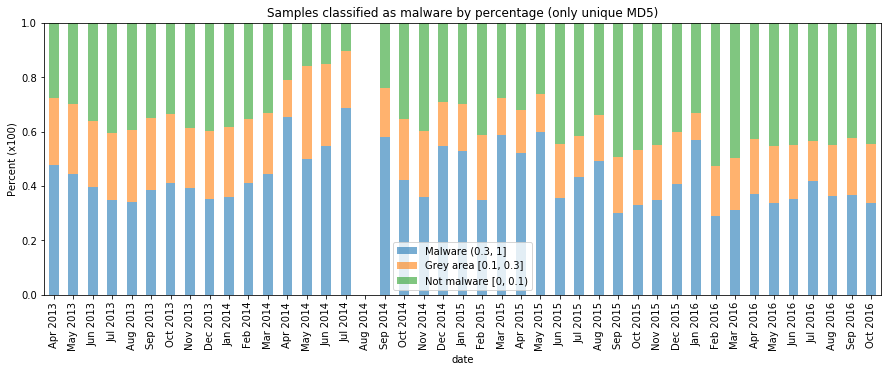

In [27]:
av_col_notmal = av_col_known[av_col_known < NOTMAL_THR]
av_col_mal = av_col_known[av_col_known > MAL_THR]
av_col_grey = av_col_known[(NOTMAL_THR <= av_col_known) & (av_col_known <= MAL_THR)]
print('Malware:\t{} ({:.2f})'.format(av_col_mal.count(), av_col_mal.count()/av_col_known.count()))
print('Not malware:\t{} ({:.2f})'.format(av_col_notmal.count(), av_col_notmal.count()/av_col_known.count()))
print('Grey area:\t{} ({:.2f})'.format(av_col_grey.count(), av_col_grey.count()/av_col_known.count()))

# Sanity check
assert len(av_col_known) == len(av_col_notmal) + len(av_col_mal) + len(av_col_grey)

av_col_notmal = av_col_notmal.resample('M').count().rename('Not malware [0, {})'.format(NOTMAL_THR))
av_col_mal = av_col_mal.resample('M').count().rename('Malware ({}, 1]'.format(MAL_THR))
av_col_grey = av_col_grey.resample('M').count().rename('Grey area [{}, {}]'.format(NOTMAL_THR, MAL_THR))

malware_percent = pd.concat([av_col_mal, av_col_grey, av_col_notmal], axis=1)
malware_percent = malware_percent.divide(malware_percent.sum(axis=1), axis=0)
plotByMonthPercentage(malware_percent, 'malware_percent', 'Samples classified as malware by percentage (only unique MD5)')

## Evolution in duplicated samples

In [28]:
dups_class = pe32.copy()
dups_class['index'] = dups_class.index
# Apply the normalization again, to facilitate filtering
dups_class['antivirus'] = dups_class['antivirus'].apply(normalize)
# Keep only duplicated samples that changed the antivirus classification
dups_class = dups_class.drop_duplicates(['md5', 'antivirus'])
# Keep only duplicated that changed in time, don't have access to the fulltimestamp, hence same day samples
# won't be helpful
dups_class = dups_class.drop_duplicates(['md5', 'index'], keep='last')
# Keep only duplicates
dups_class = dups_class[dups_class.duplicated(subset='md5', keep=False)]

### From unknown to known

In [29]:
# If the first submission was unknown (-1), calculate the time it took until
# sample became known.
def unknown_to_known(sample):
    if sample[0] == -1:
        for idx, val in enumerate(sample[1:]):
            if val != -1:
                # We take the average between the submission when the sample was known and the
                # submission before that, to give the vendors some slack
                # + 1 because we're enumerating from [1:]
                avg_days = (sample.index[idx + 1] - sample.index[idx]).days / 2
                return (sample.index[idx + 1] - sample.index[0]).days - avg_days
    else:
        return -1.0
        
dups_unk_to_k = dups_class.groupby('md5').agg({'antivirus': unknown_to_known}).antivirus.rename('days')
dups_unk_to_k = (dups_unk_to_k[dups_unk_to_k.map(lambda x: x != -1)]).astype(int)

print('Mean (in days) for a sample to become known:\t{:.2f}'.format(dups_unk_to_k.mean()))
print('Standard deviation (in days):\t\t\t{:.2f}'.format(dups_unk_to_k.std()))

Mean (in days) for a sample to become known:	33.09
Standard deviation (in days):			69.71


### Tendency in the classification

In [30]:
# Calculates the tendency for a given sample, based on duplicated submissions
# Returns 1 for positive tendency (later submissions have higher classification)
# Returns -1 for negative tendency (later submissions have lower classification)
# Returns 0 for no tendency (classification between submissions doesn't go above a threshold)
# Returns -2 if there aren't enough submissions to check for a tendency
def tendency(sample):
    from functools import reduce
    # If the submissions didn't vary by more than this threshold, no tendency
    CHANGE_THR = 0.05
    values = []
    
    for idx, val in sample.iteritems():
        if val != -1:
            values.append(val)
    # Not enough values to check for tendency
    if len(values) < 2:
        return -2
    
    diff = [y - x for x, y in zip(values, values[1:])]
    # The mean variation is above the threshold
    if reduce(lambda x, y: abs(x) + abs(y), diff)/len(diff) > CHANGE_THR:
        pos = sum(x > 0 for x in diff)
        neg = sum(x < 0 for x in diff)
        return 1 if pos > neg else -1
    else:
        return 0
        

dups_tendency = dups_class.groupby('md5').agg({'antivirus': tendency}).antivirus.rename('tendency')

In [31]:
pos_tend = dups_tendency[dups_tendency == 1]
neg_tend = dups_tendency[dups_tendency == -1]

print('Number of submissions with positive tendency: {} ({:.2f})'.format(pos_tend.count(), pos_tend.count()/dups_tendency.count()))
print('Number of submissions with negative tendency: {} ({:.2f})'.format(neg_tend.count(), neg_tend.count()/dups_tendency.count()))

Number of submissions with positive tendency: 6569 (0.49)
Number of submissions with negative tendency: 299 (0.02)


### Average time to classify a malware

In [32]:
# Calculate the days it took for a sample go from below the threshold
# to above the malware threshold. Only includes samples that were known but
# not classified as malware
def zero_to_malware(sample):
    if 0 <= sample[0] < NOTMAL_THR:
        for idx, val in enumerate(sample[1:]):
            if val > 0.5:
                # + 1 because we're enumerating from [1:]
                avg_days = (sample.index[idx + 1] - sample.index[idx]).days / 2
                return (sample.index[idx + 1] - sample.index[0]).days - avg_days
        # If the sample never goes above the threshold
        return -1
    else:
        return -1
    
dups_zero_to_mal = dups_class.groupby('md5').agg({'antivirus': zero_to_malware}).antivirus.rename('days').astype(int)
dups_zero_to_mal = dups_zero_to_mal[dups_zero_to_mal != -1]

print('Mean (in days) to go from below the threshold to above: {:.2f}'.format(dups_zero_to_mal.mean()))
print('Median to go from below the threshold to above: {:.2f}'.format(dups_zero_to_mal.median()))
print('Standard deviation (in days): {:.2f}'.format(dups_zero_to_mal.std()))

Mean (in days) to go from below the threshold to above: 42.85
Median to go from below the threshold to above: 7.00
Standard deviation (in days): 101.06
